In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("qsar_aquatic_toxicity.csv")
data.head()

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,"quantitative response, LC50 [-LOG(mol/L)]",Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740,NaN,NaN,NaN
1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330,NaN,NaN,NaN
2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019,NaN,NaN,NaN
3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723,NaN,NaN,NaN
4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979,NaN,NaN,NaN


In [9]:
data_p = data.drop('quantitative response, LC50 [-LOG(mol/L)]',axis=1)

In [10]:
y = data.iloc[:,1]
data_x = data.iloc[:,:-1]
data_x.shape

(546, 11)

In [11]:
scaler = StandardScaler()
data_n = scaler.fit_transform(data_x)

/Users/meenalsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/meenalsharma/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(data_x, y, test_size=0.33, random_state=42)

In [13]:
reg = LinearRegression().fit(X_train, y_train)



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [14]:
y_pred = reg.predict(X_train)
print("Coefficients",reg.coef_)
print("Intercept",reg.intercept_)
y_pred_test = reg.predict(X_test)

NameError: name 'reg' is not defined

In [15]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_pred_test))
print(mean_squared_error(y_test,y_pred_test))

NameError: name 'y_pred_test' is not defined

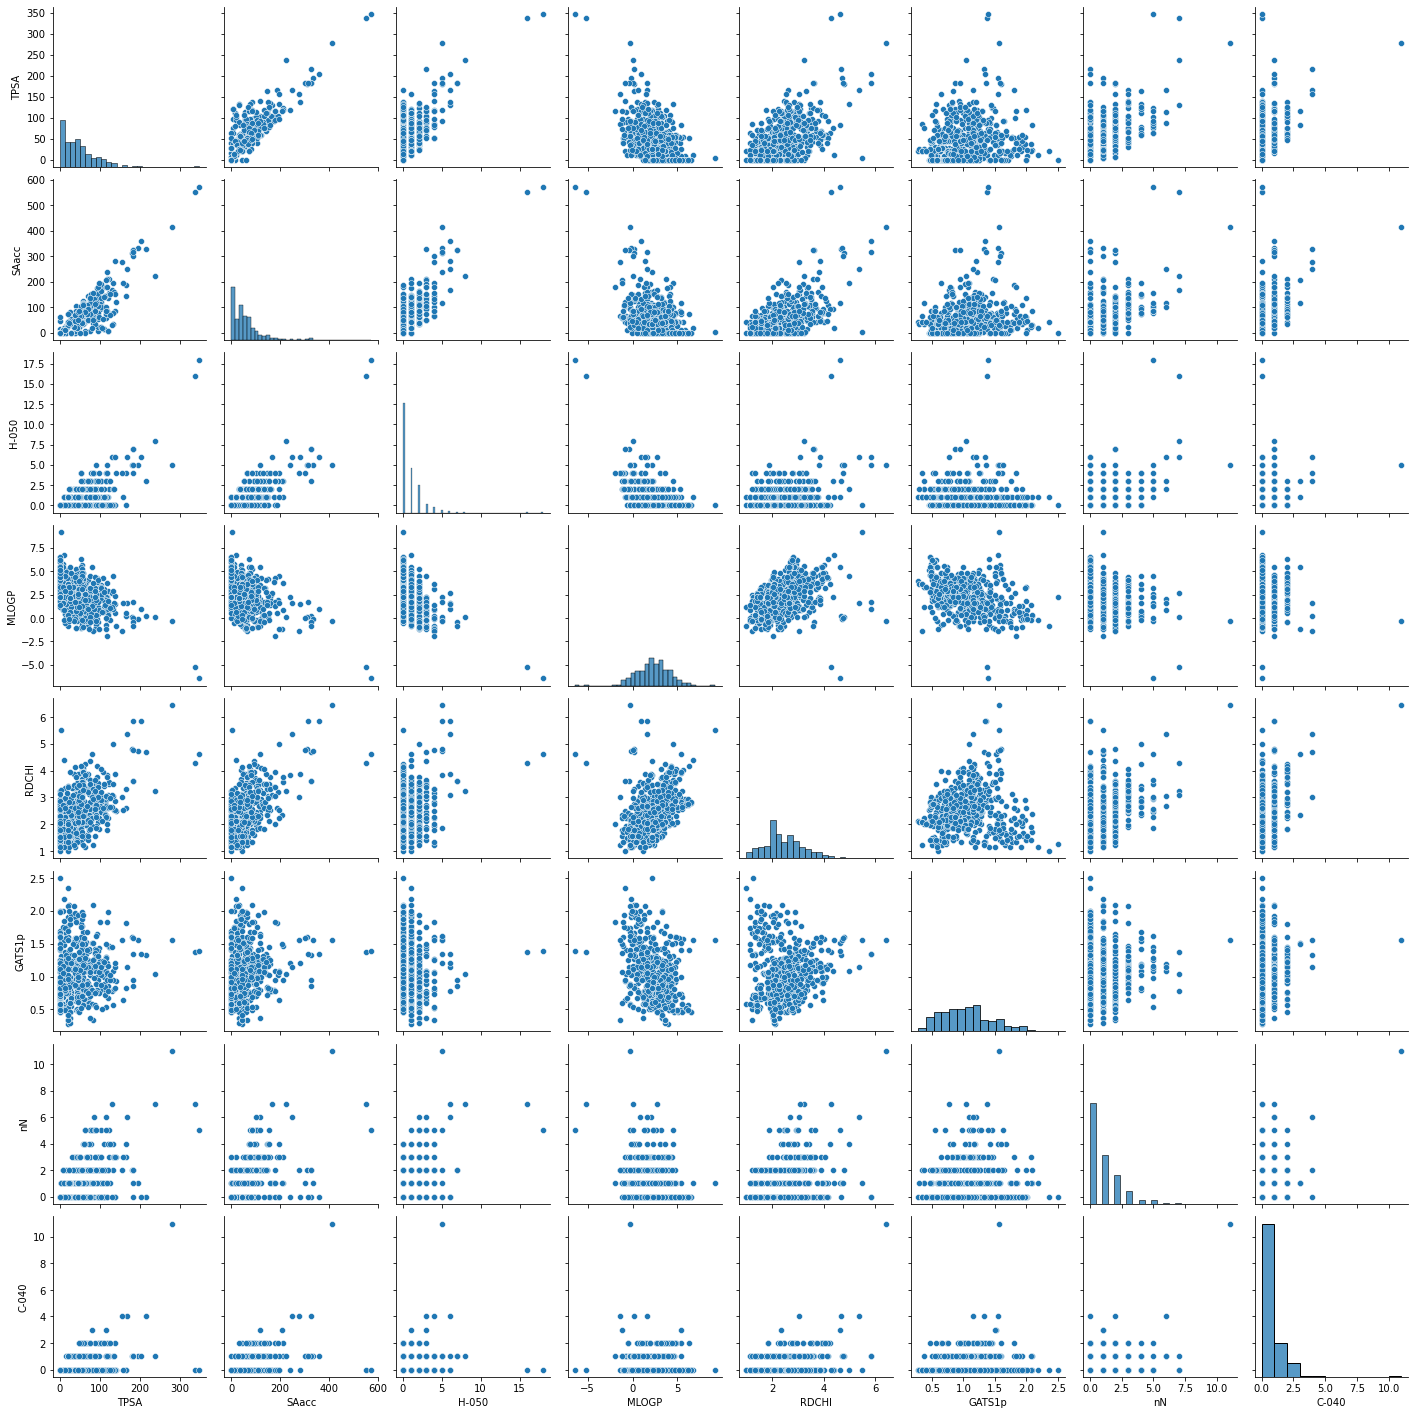

In [71]:
sns.pairplot(data_p)

# Q plot for Variables follow a Normal Distribution

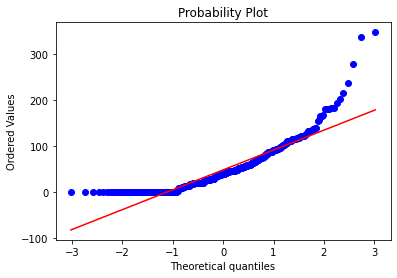

In [58]:
import scipy.stats as stats
stats.probplot(data.iloc[:,0], dist="norm", plot=plt)
plt.show()

 # no collinearity -> There is multi collinearity

In [59]:

import seaborn as sns
corr= data.corr()
corr.style.background_gradient(cmap='coolwarm')
#sns.heatmap(data.corr());

,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,LC50
TPSA,1.000000,0.859633,0.658701,-0.457921,0.524282,0.172631,0.612376,0.410065,0.037984
SAacc,0.859633,1.000000,0.771259,-0.403166,0.571916,0.209980,0.500374,0.450060,-0.097967
H-050,0.658701,0.771259,1.000000,-0.491507,0.284878,0.061080,0.473903,0.154575,-0.189121
MLOGP,-0.457921,-0.403166,-0.491507,1.000000,0.327002,-0.380280,-0.290784,-0.100971,0.535512
RDCHI,0.524282,0.571916,0.284878,0.327002,1.000000,0.049991,0.342768,0.411293,0.390621
GATS1p,0.172631,0.209980,0.061080,-0.380280,0.049991,1.000000,0.070317,0.143258,-0.311821
nN,0.612376,0.500374,0.473903,-0.290784,0.342768,0.070317,1.000000,0.290193,-0.070179
C-040,0.410065,0.450060,0.154575,-0.100971,0.411293,0.143258,0.290193,1.000000,0.024310
LC50,0.037984,-0.097967,-0.189121,0.535512,0.390621,-0.311821,-0.070179,0.024310,1.000000


In [68]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.531649859760695e-15


In [65]:
residuals_test = y_test.values-y_pred_test

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


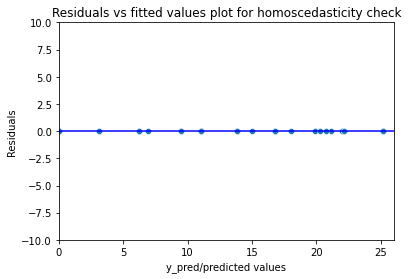

In [64]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


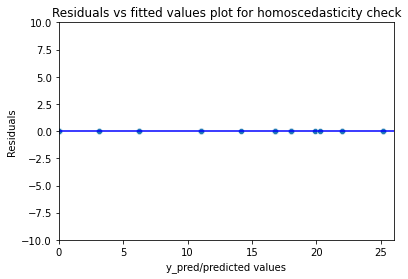

In [67]:
p = sns.scatterplot(y_pred_test,residuals_test)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

# Linear relationships 

Text(0.5, 1.0, 'NON-Linear Relationship')

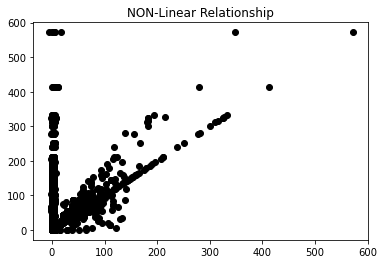

In [60]:
plt.plot(X_train, y_train, 'o', color='black');
plt.title("NON-Linear Relationship")

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


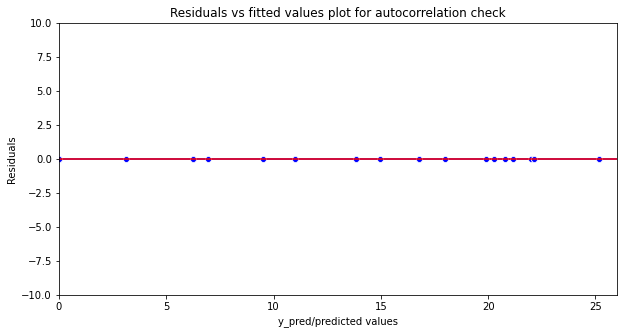

In [72]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')


In [79]:
def df_autocorr(data, lag=1, axis=0):
    return data.apply(lambda col: col.autocorr(lag), axis=axis)

auto_corr_= df_autocorr(data)

In [81]:
auto_corr_

TPSA      0.325150
SAacc     0.317847
H-050     0.283112
MLOGP     0.417500
RDCHI     0.236840
GATS1p    0.445621
nN        0.208831
C-040     0.193578
LC50      0.316293
dtype: float64

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


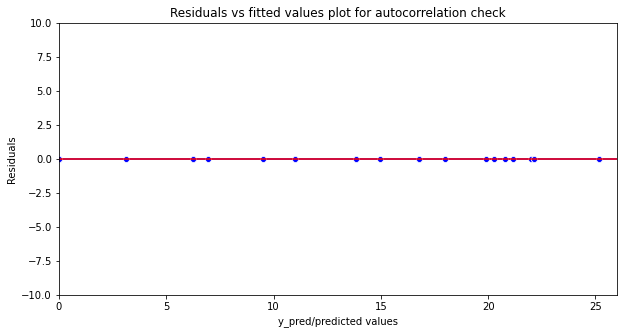

In [82]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


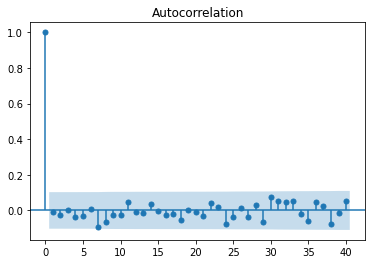

In [83]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])
#Since p value is less than 0.05 we reject the null hypothesis that error terms are not autocorrelated.
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

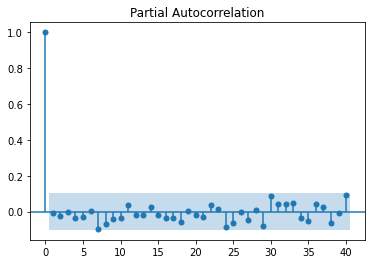

In [84]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

In [ ]:
# There is no spikes in the blue region of partial auto